In [1]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [6]:
data= pd.read_csv('3.2 Countries_exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


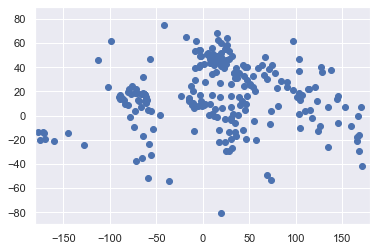

In [7]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [14]:
x = data.iloc[:,1:]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [25]:
kmeans= KMeans(4)

In [26]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
identified_cluster = kmeans.fit_predict(x)

In [28]:
identified_cluster

array([0, 1, 1, 0, 3, 3, 3, 1, 0, 1, 0, 1, 2, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2, 1, 1, 3, 0, 2, 3, 1,
       1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 0, 3, 0, 3, 0, 1, 1,
       3, 3, 1, 3, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 0,
       2, 0, 2, 1, 0, 3, 0, 3, 2, 3, 1, 2, 1, 3, 1, 1, 3, 1, 3, 0, 3, 1,
       2, 1, 1, 1, 1, 2, 0, 0, 2, 3, 1, 2, 1, 3, 3, 0, 3, 1, 1, 3, 3, 3,
       2, 0, 3, 3, 3, 1, 1, 0, 2, 3, 3, 3, 2, 3, 2, 2, 1, 3, 0, 1, 1, 2,
       1, 2, 3, 2, 3, 0, 0, 3, 3, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 0,
       2, 3, 0, 1, 0, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2, 0, 3, 2, 3, 0, 3, 1,
       1, 0, 3, 1, 0, 3, 3, 3, 1, 0, 1, 1, 0, 1, 3, 2, 1, 1, 2, 0, 0, 3,
       3, 2, 1, 1, 3, 0, 0, 1, 3, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1])

In [29]:
data_with_clusters= data.copy()
data_with_clusters['clusters']=identified_cluster

In [30]:
data_with_clusters

,name,Longitude,Latitude,clusters
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


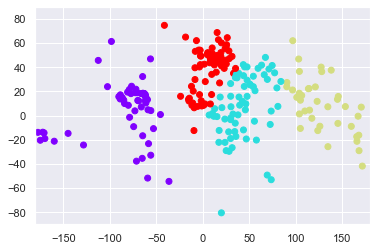

In [31]:
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['clusters'],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [33]:
kmeans.inertia_

256573.08675934302

In [39]:
wcss=[]
for i in range(1,240):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_inter = kmeans.inertia_
    wcss.append(wcss_inter)

In [44]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192194.9829002524,
 151428.48761967372,
 127966.43202350658,
 102873.2526445741,
 85732.86460438173,
 76439.49644818818,
 69607.20294601863,
 63323.28003197517,
 60095.35968832652,
 54499.251207315785,
 50463.504935439414,
 47114.841459396994,
 45158.17100647539,
 42193.28783219532,
 39443.90241475534,
 36895.71450355509,
 34479.05882627436,
 33080.809824608004,
 30207.071636128305,
 29016.908331232327,
 27373.47574884272,
 25595.645148793068,
 24393.470930166513,
 22365.874693090907,
 21953.66877678444,
 20377.451660282997,
 19654.536927569614,
 18846.612272642982,
 18657.92952195674,
 16577.205849628685,
 16938.020115432475,
 16380.183279610901,
 14844.010531326934,
 14318.356598005237,
 13564.553698376514,
 13399.605777797751,
 12901.586026209674,
 12349.485105092324,
 11848.741946895805,
 11308.656678688261,
 11230.169838112353,
 11327.634633465164,
 10441.69840812423,
 9908.266997875711,
 9791.8761

Text(0, 0.5, 'wcss')

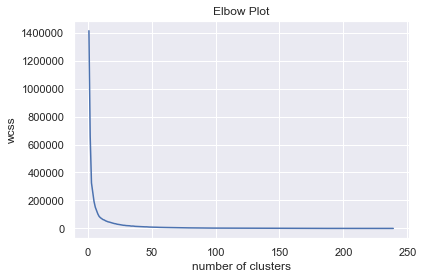

In [45]:
number_of_clusters = range(1,240)
plt.plot(number_of_clusters,wcss)
plt.title('Elbow Plot')
plt.xlabel('number of clusters')
plt.ylabel('wcss')